In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading in the measured data from .csv files

In [12]:
# import in the csv files
wafer1_resistance_ohm = pd.read_csv('wafer1_resistance_ohm.csv')
wafer2_resistance_ohm = pd.read_csv('wafer2_resistance_ohm.csv')
wafer3_resistance_ohm = pd.read_csv('wafer3_resistance_ohm.csv')

wafer1_thickness_um = pd.read_csv('wafer1_thickness_um.csv')
wafer2_thickness_um = pd.read_csv('wafer2_thickness_um.csv')
wafer3_thickness_um = pd.read_csv('wafer3_thickness_um.csv')

# convert to numpy
wafer1_resistance_ohm = wafer1_resistance_ohm.to_numpy()
wafer2_resistance_ohm = wafer2_resistance_ohm.to_numpy()
wafer3_resistance_ohm = wafer3_resistance_ohm.to_numpy()

wafer1_thickness_um = wafer1_thickness_um.to_numpy()
wafer2_thickness_um = wafer2_thickness_um.to_numpy()
wafer3_thickness_um = wafer3_thickness_um.to_numpy()

# thickness should be constant so convert into average scalar
wafer1_thickness_um = np.mean(wafer1_thickness_um)
wafer2_thickness_um = np.mean(wafer2_thickness_um)
wafer3_thickness_um = np.mean(wafer3_thickness_um)

## Calculating Resistivity from Probe Measurement

In [49]:
# calculating Rs
def sheet_resistance(resistance):
    correction_factor = np.pi / np.log(2)
    return resistance * correction_factor

# calculating resistivity in ohm-cm

def resistivity(sheet_resistance, thickness):
    # sheet_resistance is a numpy array
    # thickness is a scalar
    um_factor = 10**-4
    return sheet_resistance * thickness * um_factor

In [50]:
# wafer 1

wafer1_sheet_resistance = sheet_resistance(wafer1_resistance_ohm)
wafer1_resistivity = resistivity(wafer1_sheet_resistance, wafer1_thickness_um)

wafer1_avg_resistivity = np.mean(wafer1_resistivity)

print("Wafer 1 average resistivity: ", wafer1_avg_resistivity, "ohm-cm")

Wafer 1 average resistivity:  3.8891992592936386 ohm-cm


In [51]:
# wafer 2

wafer2_sheet_resistance = sheet_resistance(wafer2_resistance_ohm)
wafer2_resistivity = resistivity(wafer2_sheet_resistance, wafer2_thickness_um)

wafer2_avg_resistivity = np.mean(wafer2_resistivity)

print("Wafer 2 average resistivity: ", wafer2_avg_resistivity, "ohm-cm")

Wafer 2 average resistivity:  0.04575236771860856 ohm-cm


In [52]:
# wafer 3

wafer3_sheet_resistance = sheet_resistance(wafer3_resistance_ohm)
wafer3_resistivity = resistivity(wafer3_sheet_resistance, wafer3_thickness_um)

wafer3_avg_resistivity = np.mean(wafer3_resistivity)

print("Wafer 3 average resistivity: ", wafer3_avg_resistivity, "ohm-cm")

Wafer 3 average resistivity:  4.438146238968281 ohm-cm


In [53]:
# in scientific notation
print("Wafer 1 average resistivity: ", "{:.5e}".format(wafer1_avg_resistivity), "ohm-cm")
print("Wafer 2 average resistivity: ", "{:.5e}".format(wafer2_avg_resistivity), "ohm-cm")
print("Wafer 3 average resistivity: ", "{:.5e}".format(wafer3_avg_resistivity), "ohm-cm")

Wafer 1 average resistivity:  3.88920e+00 ohm-cm
Wafer 2 average resistivity:  4.57524e-02 ohm-cm
Wafer 3 average resistivity:  4.43815e+00 ohm-cm


## Determining Carrier Concentration for Resistivity Data

In [54]:
# Assumptions and equations

mu_p = 480 # V/cm-s
N_d = 0 # cm^-3
# and Complete ionization
q = 1.6 * 10**-19 # C

# N_a is the impurity concentration N_I

def impurity_concentration(q, mu_p, rho):
    return 1 / (q * mu_p * rho)

In [61]:
# wafer 1 impurity concentration

wafer1_impurity_concentration = impurity_concentration(q, mu_p, wafer1_resistivity)
wafer1_avg_impurity_concentration = np.mean(wafer1_impurity_concentration)

print("Wafer 1 average impurity concentration: ", wafer1_avg_impurity_concentration, "cm^-3")

Wafer 1 average impurity concentration:  3348175090103037.0 cm^-3


In [62]:
# wafer 2 impurity concentration

wafer2_impurity_concentration = impurity_concentration(q, mu_p, wafer2_resistivity)
wafer2_avg_impurity_concentration = np.mean(wafer2_impurity_concentration)

print("Wafer 2 average impurity concentration: ", wafer2_avg_impurity_concentration, "cm^-3")

Wafer 2 average impurity concentration:  2.846667579511292e+17 cm^-3


In [63]:
# wafer 3 impurity concentration

wafer3_impurity_concentration = impurity_concentration(q, mu_p, wafer3_resistivity)
wafer3_avg_impurity_concentration = np.mean(wafer3_impurity_concentration)

print("Wafer 3 average impurity concentration: ", wafer3_avg_impurity_concentration, "cm^-3")

Wafer 3 average impurity concentration:  2933918241062257.0 cm^-3


In [64]:
# in scientific notation
print("Wafer 1 average impurity concentration: ", "{:.5e}".format(wafer1_avg_impurity_concentration), "cm^-3")
print("Wafer 2 average impurity concentration: ", "{:.5e}".format(wafer2_avg_impurity_concentration), "cm^-3")
print("Wafer 3 average impurity concentration: ", "{:.5e}".format(wafer3_avg_impurity_concentration), "cm^-3")

Wafer 1 average impurity concentration:  3.34818e+15 cm^-3
Wafer 2 average impurity concentration:  2.84667e+17 cm^-3
Wafer 3 average impurity concentration:  2.93392e+15 cm^-3


## Plot of Impurity Concentration vs. Resistivity

Plot on a log-log scale the impurity concentration, NI (in this case, the same as the \
carrier concentration, NA) versus resistivity, ρ for the class data set. Your plot should \
resemble Figure 5.4 on pp. 165 of the Neamen text. Remember that the SMIF samples \
were all p-type (Boron) doped. This plot should have many values of ρ and NI based \
on the class data.

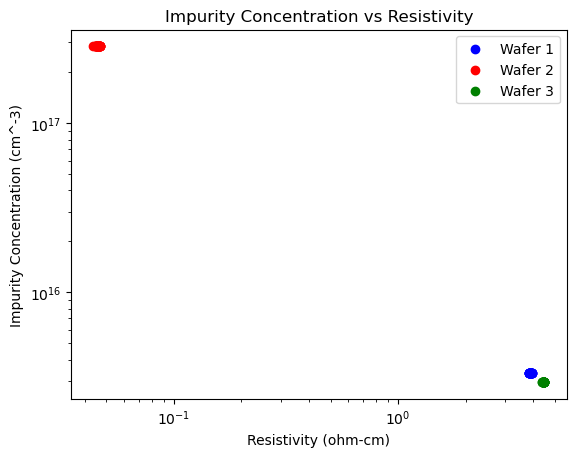

In [84]:
wafer_resistivity_all_points = np.concatenate((wafer1_resistivity, wafer2_resistivity, wafer3_resistivity))
wafer_impurity_concentration_all_points = np.concatenate((wafer1_impurity_concentration, wafer2_impurity_concentration, wafer3_impurity_concentration))

wafer1_avg_impurity_concentration_arr = np.zeros(len(wafer1_resistivity))
wafer2_avg_impurity_concentration_arr = np.zeros(len(wafer2_resistivity))
wafer3_avg_impurity_concentration_arr = np.zeros(len(wafer3_resistivity))

for i in range(len(wafer1_resistivity)):
    wafer1_avg_impurity_concentration_arr[i] = wafer1_avg_impurity_concentration
    wafer2_avg_impurity_concentration_arr[i] = wafer2_avg_impurity_concentration
    wafer3_avg_impurity_concentration_arr[i] = wafer3_avg_impurity_concentration

wafer_avg_impurity_concentration_arr = np.concatenate((wafer1_avg_impurity_concentration_arr, wafer2_avg_impurity_concentration_arr, wafer3_avg_impurity_concentration_arr))


# plotting on log log scale
# N_a on y axis and resistivity on x axis
plt.scatter(wafer1_resistivity, wafer1_avg_impurity_concentration_arr, color='blue')
plt.scatter(wafer2_resistivity, wafer2_avg_impurity_concentration_arr, color='red')
plt.scatter(wafer3_resistivity, wafer3_avg_impurity_concentration_arr, color='green')
plt.legend(['Wafer 1', 'Wafer 2', 'Wafer 3'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Resistivity (ohm-cm)')
plt.ylabel('Impurity Concentration (cm^-3)')
plt.title('Impurity Concentration vs Resistivity')
plt.show()


Determine a curve-fit to this data from the above plot.

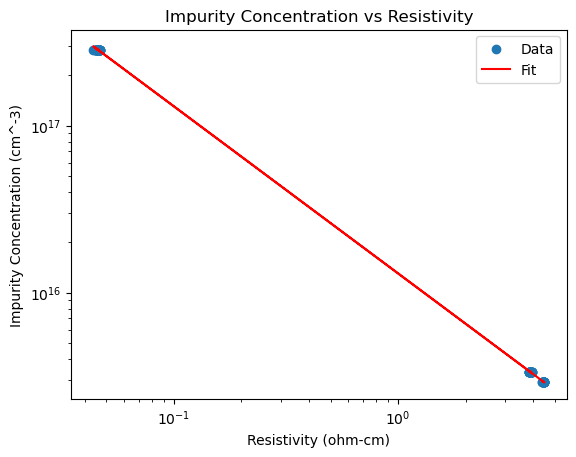

Slope of the fit line:  -0.9999977224654075
Intercept of the fit line:  37.10538567394722


In [88]:
fit = np.polyfit(np.log(wafer_resistivity_all_points.flatten()), np.log(wafer_avg_impurity_concentration_arr.flatten()), deg=1)
fit_fn = np.poly1d(fit)

plt.scatter(wafer_resistivity_all_points, wafer_avg_impurity_concentration_arr)
plt.plot(wafer_resistivity_all_points, np.exp(fit_fn(np.log(wafer_resistivity_all_points))), color='red')
plt.legend(['Data', 'Fit'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Resistivity (ohm-cm)')
plt.ylabel('Impurity Concentration (cm^-3)')
plt.title('Impurity Concentration vs Resistivity')
plt.show()

print("Slope of the fit line: ", fit[0])
print("Intercept of the fit line: ", fit[1])


What is the spread in resistivity data for the carrier concentrations of each wafer? You \
should report the 3 spreads as one number each, not a range of values. \
(e.g. max - min, standard deviation, variance)

In [101]:
#standard dev
wafer1_resistivity_std = np.std(wafer1_resistivity)
wafer2_resistivity_std = np.std(wafer2_resistivity)
wafer3_resistivity_std = np.std(wafer3_resistivity)

# variance
wafer1_resistivity_var = np.var(wafer1_resistivity)
wafer2_resistivity_var = np.var(wafer2_resistivity)
wafer3_resistivity_var = np.var(wafer3_resistivity)

#min
wafer1_resistivity_min = np.min(wafer1_resistivity)
wafer2_resistivity_min = np.min(wafer2_resistivity)
wafer3_resistivity_min = np.min(wafer3_resistivity)

#max
wafer1_resistivity_max = np.max(wafer1_resistivity)
wafer2_resistivity_max = np.max(wafer2_resistivity)
wafer3_resistivity_max = np.max(wafer3_resistivity)

# % diff from mean of max and min
wafer1_resistivity_diff = (wafer1_resistivity_max - wafer1_resistivity_min) / wafer1_avg_resistivity * 100
wafer2_resistivity_diff = (wafer2_resistivity_max - wafer2_resistivity_min) / wafer2_avg_resistivity * 100
wafer3_resistivity_diff = (wafer3_resistivity_max - wafer3_resistivity_min) / wafer3_avg_resistivity * 100

print("Wafer 1: ")
print("         min: ", np.min(wafer1_resistivity))
print("         max: ", np.max(wafer1_resistivity))
print("         pct diff from mean of max and min: ", wafer1_resistivity_diff)
print("         standard deviation: ", wafer1_resistivity_std)
print("         variance: ", wafer1_resistivity_std**2)

print("Wafer 2: ")
print("         min: ", np.min(wafer2_resistivity))
print("         max: ", np.max(wafer2_resistivity))
print("         pct diff from mean of max and min: ", wafer2_resistivity_diff)
print("         standard deviation: ", wafer2_resistivity_std)
print("         variance: ", wafer2_resistivity_std**2)

print("Wafer 3: ")
print("         min: ", np.min(wafer3_resistivity))
print("         max: ", np.max(wafer3_resistivity))
print("         pct diff from mean of max and min: ", wafer3_resistivity_diff)
print("         standard deviation: ", wafer3_resistivity_std)
print("         variance: ", wafer3_resistivity_std**2)


Wafer 1: 
         min:  3.8408751326335575
         max:  3.9596309996916004
         pct diff from mean of max and min:  3.053478599078296
         standard deviation:  0.03214411704372631
         variance:  0.001033244260520776
Wafer 2: 
         min:  0.043724800500578066
         max:  0.04682236226997136
         pct diff from mean of max and min:  6.770276433438963
         standard deviation:  0.0007292571778855838
         variance:  5.318160314976461e-07
Wafer 3: 
         min:  4.401435848648695
         max:  4.484643454254037
         pct diff from mean of max and min:  1.8748279377266648
         standard deviation:  0.02218330841929633
         variance:  0.0004920991724256234


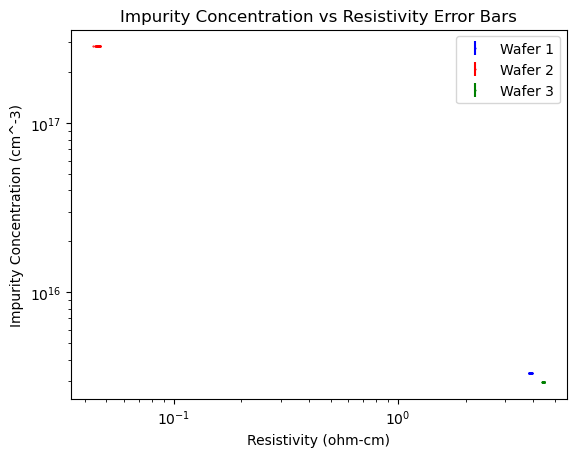

In [100]:
# plotting the error bars

plt.errorbar(wafer1_resistivity, wafer1_avg_impurity_concentration_arr, yerr=wafer1_resistivity_std, fmt='o', color='blue', markersize=0.5)
plt.errorbar(wafer2_resistivity, wafer2_avg_impurity_concentration_arr, yerr=wafer2_resistivity_std, fmt='o', color='red', markersize=0.5)
plt.errorbar(wafer3_resistivity, wafer3_avg_impurity_concentration_arr, yerr=wafer3_resistivity_std, fmt='o', color='green', markersize=0.5)
plt.legend(['Wafer 1', 'Wafer 2', 'Wafer 3'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Resistivity (ohm-cm)')
plt.ylabel('Impurity Concentration (cm^-3)')
plt.title('Impurity Concentration vs Resistivity Error Bars')
plt.show()


## Estimating expected Resistivity given a Carrier Concentration

For a Si p-type (Boron) doped carrier concentration, Na of 1 × 10^17 cm-3 , what range \
of resistivity, ρ, values would you expect to obtain from this sample? Use your class \
averaged data plot and curve-fit from Section 4 to answer this question. Note that a \
range of resistivity is specified, so justify the range that you choose.

In [104]:
Boron_Na = 1 * 10**17 # cm^-3

# behaves most like wafer 2 (from TA Han).
# so use the % diff from mean of max and min to estimate the error in the impurity concentration

log_boron_Na = np.log(Boron_Na)

m = fit[0]
b = fit[1]

log_resistivity_boron = m * log_boron_Na + b

resistivity_boron = np.exp(log_resistivity_boron)

print("Resistivity of Boron: ", resistivity_boron, "ohm-cm")

# range of resistivity
resistivity_boron_min = resistivity_boron - resistivity_boron * ((wafer2_resistivity_diff * 0.5) / 100)
resistivity_boron_max = resistivity_boron + resistivity_boron * ((wafer2_resistivity_diff * 0.5) / 100)

print("Range of resistivity of Boron: ", resistivity_boron_min, "ohm-cm to ", resistivity_boron_max, "ohm-cm")


Resistivity of Boron:  0.1302275784924744 ohm-cm
Range of resistivity of Boron:  0.12581919496421728 ohm-cm to  0.13463596202073153 ohm-cm


This range was chosen because I calculated the % difference between max and min values \
 in previous question. Using the pct difference from wafer 2 (as that is the nearest to \
  our input impurity concentration), we can calculate the error ranges. We do \
   total value +- (error/2 * value) to get the min and max ranges of resistivity for the \
    calculated value of boron

# Device Performance based on Doping and Sample Data

In [108]:
# lambda function for I in I = V/R
I = lambda V, R: V / R

def resistance(rho, L, A):
    return rho * (L / A)

In [109]:
L = 0.001 # cm
A = 10**-6 # cm^2
V = 5 # V

min_R = resistance(resistivity_boron_min, L, A)
avg_R = resistance(resistivity_boron, L, A)
max_R = resistance(resistivity_boron_max, L, A)

min_I = I(V, max_R)
avg_I = I(V, avg_R)
max_I = I(V, min_R)

print("Current: ", avg_I, "A")
print("Current range: ", min_I, "A to ", max_I, "A")

Current:  0.038394325210377306 A
Current range:  0.03713718032653184 A to  0.03973956439176064 A


Refer to question 5 for why we have a range - the potential range carries forward.